Name :- Harsh Mishra  
Branch :- BE-CMPN-B   
RollNo :- 21102B0027

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [4]:
data = pd.read_csv('housing.csv')

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.shape

(20640, 10)

In [7]:
X = data.drop(columns={'median_house_value','ocean_proximity'},axis=1)
Y = data['median_house_value']

In [8]:
X.fillna(X.mean(),inplace=True)

In [9]:
X.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(X)

StandardScaler()

In [12]:
standardized_data = scaler.transform(X)
print(standardized_data)

[[-1.32783522  1.05254828  0.98214266 ... -0.9744286  -0.97703285
   2.34476576]
 [-1.32284391  1.04318455 -0.60701891 ...  0.86143887  1.66996103
   2.33223796]
 [-1.33282653  1.03850269  1.85618152 ... -0.82077735 -0.84363692
   1.7826994 ]
 ...
 [-0.8237132   1.77823747 -0.92485123 ... -0.3695372  -0.17404163
  -1.14259331]
 [-0.87362627  1.77823747 -0.84539315 ... -0.60442933 -0.39375258
  -1.05458292]
 [-0.83369581  1.75014627 -1.00430931 ... -0.03397701  0.07967221
  -0.78012947]]


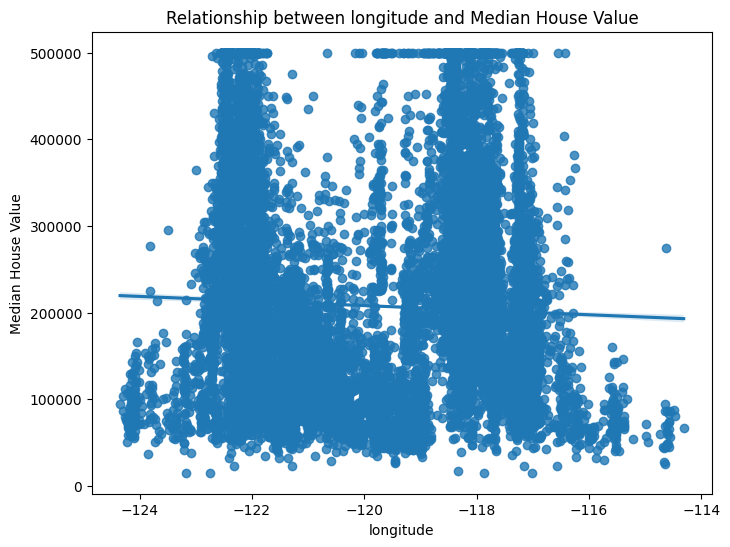

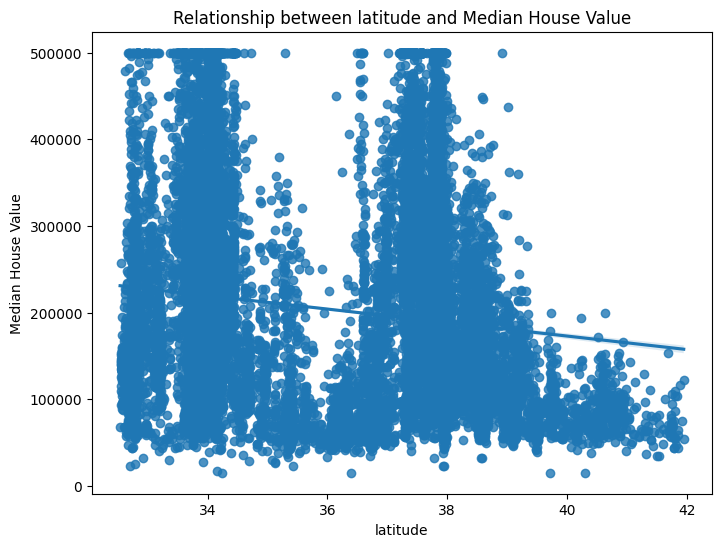

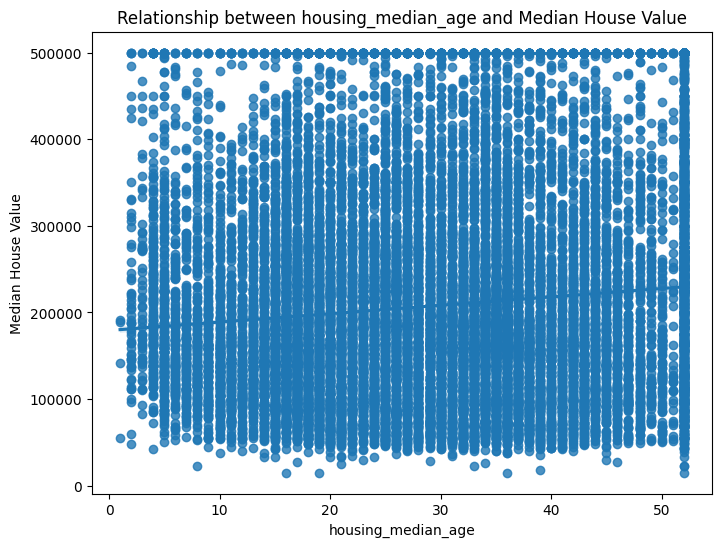

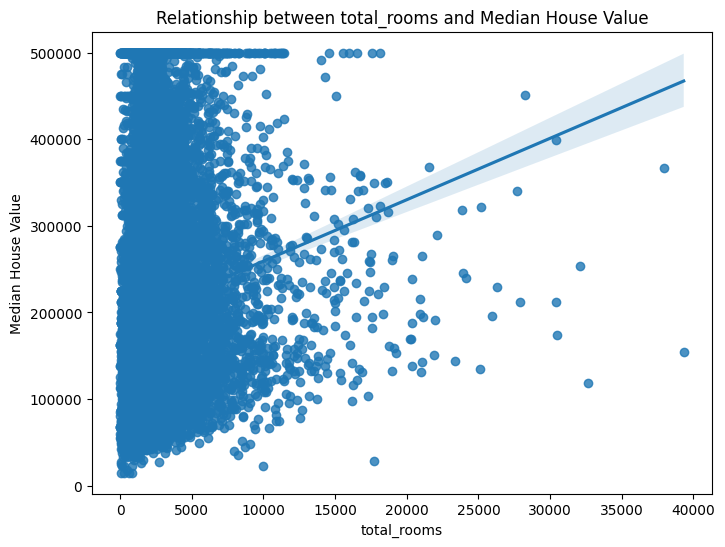

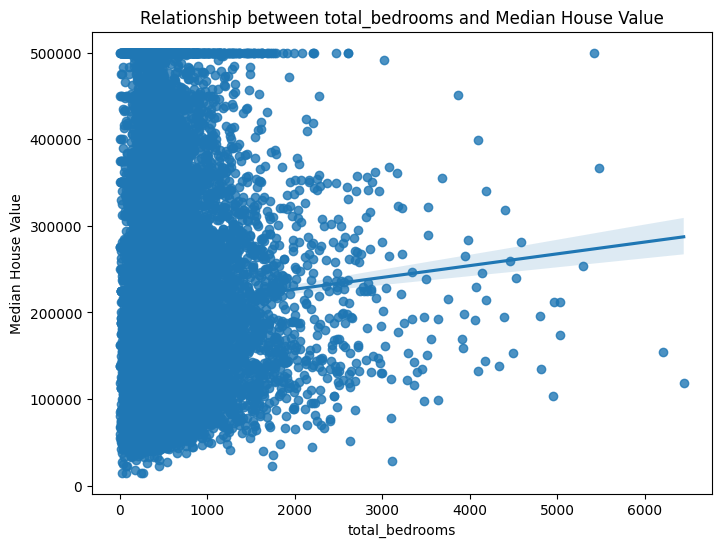

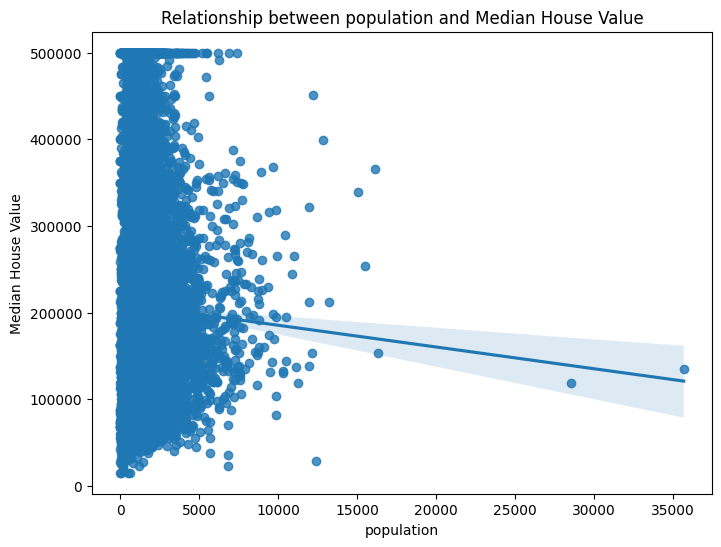

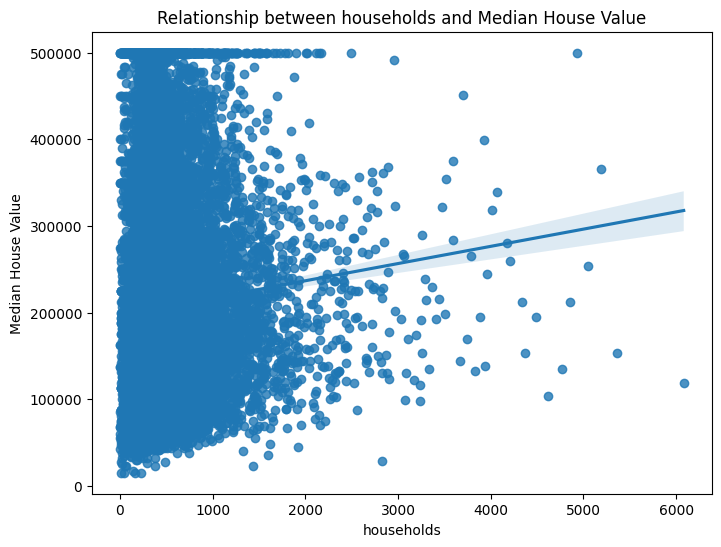

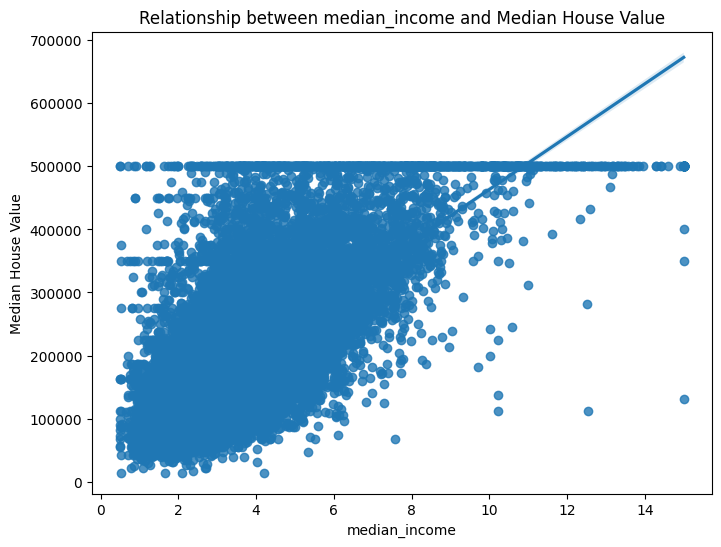

In [13]:
for feature in X.columns:
  plt.figure(figsize=(8, 6))  # Adjust figure size as needed
  sns.regplot(x=feature, y='median_house_value', data=data)
  plt.title(f"Relationship between {feature} and Median House Value")
  plt.xlabel(feature)
  plt.ylabel("Median House Value")
  plt.show()

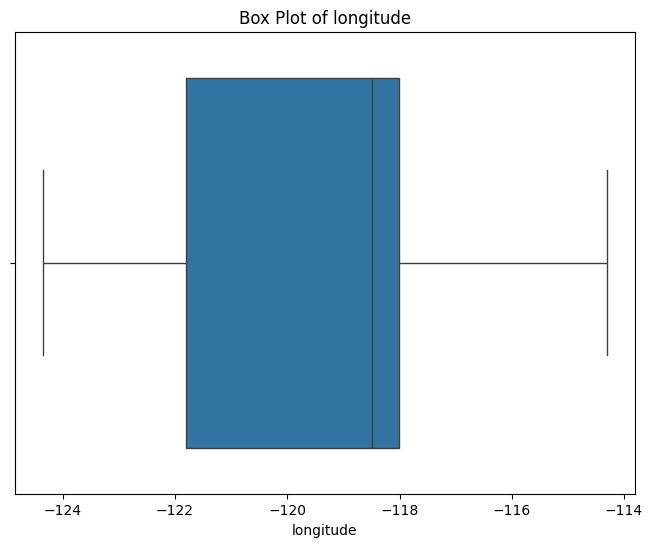

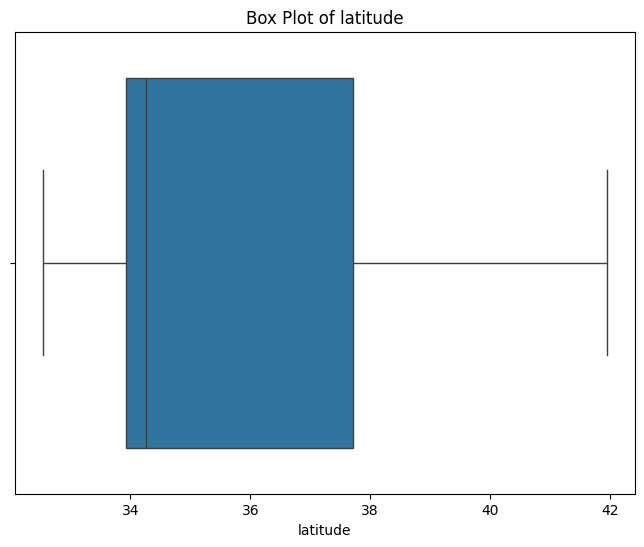

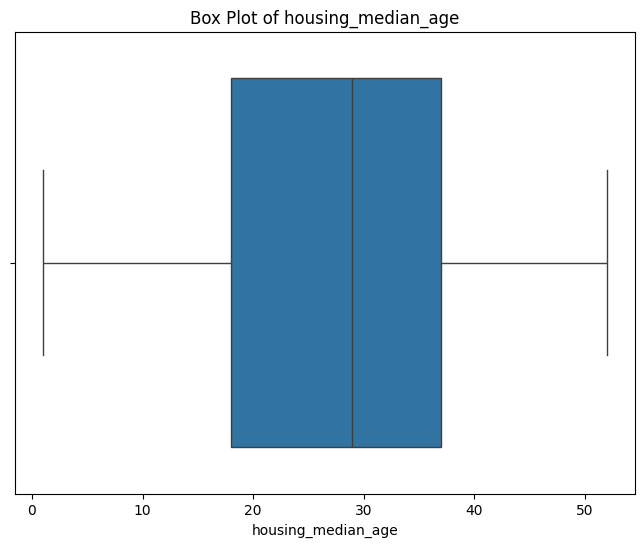

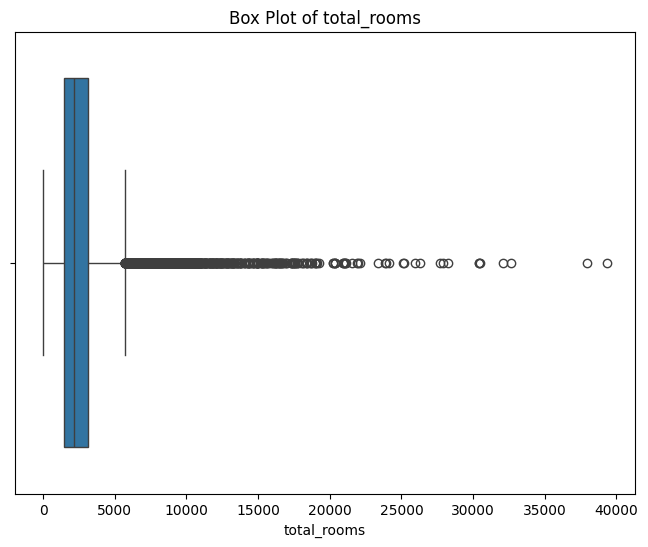

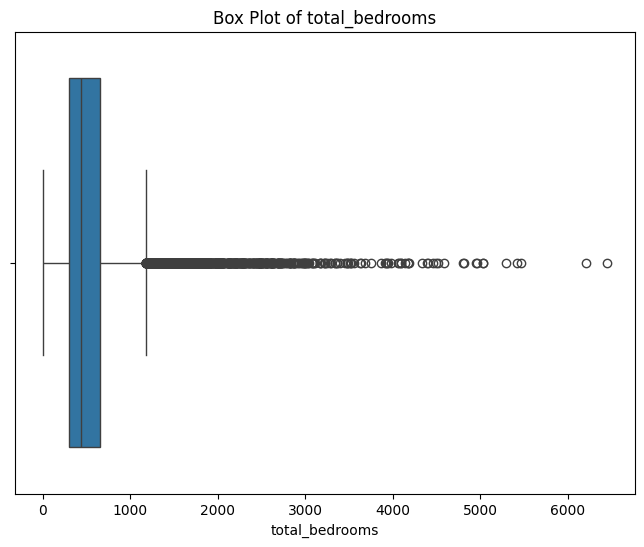

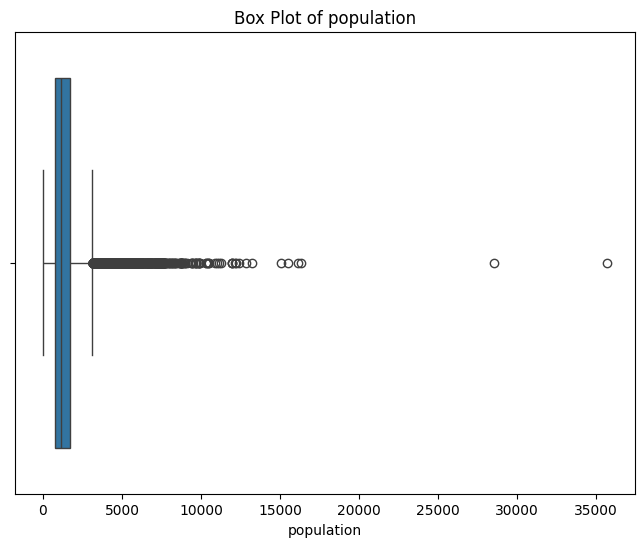

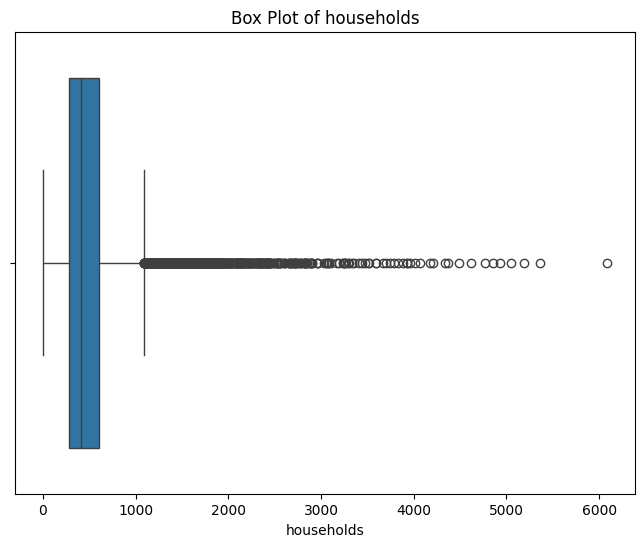

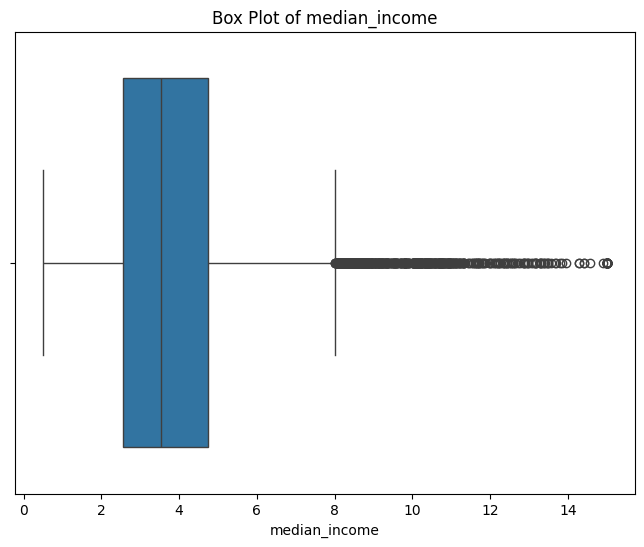

In [14]:
for feature in X.columns:
  plt.figure(figsize=(8, 6))  # Adjust figure size as needed
  sns.boxplot(x=data[feature])
  plt.title(f"Box Plot of {feature}")
  plt.show()

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [16]:
print(  X_train.shape, X_test.shape,Y_train.shape, Y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


In [17]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [18]:
model = linear_model.LinearRegression()

In [19]:
model.fit(X_train, Y_train)

LinearRegression()

In [20]:
Y_pred = model.predict(X_test)

In [21]:
print('Coeffecients : ',model.coef_)
print('Intercept : ',model.intercept_)
print('Mean Squared error: %.2f' % mean_squared_error(Y_test, Y_pred))
print('R2 score: %.2f' % r2_score(Y_test, Y_pred))
print('Mean Absolute error: %.2f' % mean_absolute_error(Y_test, Y_pred))

Coeffecients :  [-4.22505771e+04 -4.22117653e+04  1.14316214e+03 -6.92767906e+00
  8.00812420e+01 -3.91253408e+01  8.12474859e+01  3.98820080e+04]
Intercept :  -3537553.1509779515
Mean Squared error: 4975317052.43
R2 score: 0.63
Mean Absolute error: 51552.86


In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
# Perform 5-fold cross-validation
scores = cross_val_score(model, X, Y, cv=5, scoring='r2')

# Print the scores for each fold
print("Cross-validation scores:", scores)

# Print the average score
print("Average R2 score:", scores.mean())

Cross-validation scores: [0.5842381  0.52334575 0.58370791 0.54316312 0.69080914]
Average R2 score: 0.5850528038544869


In [24]:
input_data =[-119.84,36.77,6,1853,473,1397,417,1.4817]

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction[0])

43845.0874070907


In [25]:
input_data =[-122.23, 37.88,41,880,129,322,126,8.3252]

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction[0])

408521.51115301903


In [26]:
input_data =[-121.83, 38,8,2572,738,1384,684,1.7161]

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction[0])

126080.16763283126
